In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow import keras


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [3]:
url_train = '/content/drive/MyDrive/4.2/SoftCom/Dataset 3.csv'
data = pd.read_csv(url_train, engine='python')
data.head()

,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
shuffled_data = data.sample(frac=1)
shuffled_data.head()

,tweets,sentiment
9401,May I remind you pips. Depression is not a jok...,1
7987,"Holland today, Chicago tonight and tomorrow fo...",0
1356,Going to say my prayers and go to sleep!,0
2600,fantastic song ? http://blip.fm/~7aaxh,0
4967,@britneyfrancis the regular.. trying to find s...,0


In [ ]:
shuffled_data.to_csv('/content/drive/MyDrive/4.2/SoftCom/shuffledData.csv')

In [4]:
url_shuffled_data ='/content/drive/MyDrive/4.2/SoftCom/shuffledData.csv'
shuffled_data = pd.read_csv(url_shuffled_data, engine='python')
shuffled_data.head()

,Unnamed: 0,tweets,sentiment
0,5243,@peter_shih 10x! I shall publish the 2nd part...,0
1,1497,I'm back to number 12 on the Smallville trivia...,0
2,8146,insulting people who actually struggle with de...,1
3,8466,@MissPureGold *Hug..... I simply meant alot of...,1
4,5179,"Ready for this cheer boot camp to start up, ho...",0


In [5]:
EPOCH = 15

split_val = int(0.2 * shuffled_data.shape[0])

dataTest = shuffled_data.iloc[-split_val :]
dataVal = shuffled_data.iloc[- 2 * split_val : -split_val]
dataTrain = shuffled_data.iloc[: - 2 * split_val]

dataTest.head()



,Unnamed: 0,tweets,sentiment
8252,10019,@ItsPresmatic @AboksSignature We come to twitt...,1
8253,6070,@rascalflatts when are you guys coming back to...,0
8254,1039,@MagmaFlow Not yet.... too early in the AM,0
8255,10281,https://www.google.com/search?client=ms-andro...,1
8256,7161,@yami_mami i thought i was the onli one up ca...,0


In [6]:
dataVal.head()

,Unnamed: 0,tweets,sentiment
6190,1961,@Racing4Research is a way to raise money to cu...,0
6191,2509,I got a new Tattoo yesterday it is a mama lion...,0
6192,2011,Man City buy Man Utd - http://bit.ly/IuT2q (C...,0
6193,4836,@bing searching for i.e. HP NC7010 drivers dow...,0
6194,5299,@abduzeedo : loving all the new tech being sp...,0


In [7]:
dataTrain.head()

,Unnamed: 0,tweets,sentiment
0,5243,@peter_shih 10x! I shall publish the 2nd part...,0
1,1497,I'm back to number 12 on the Smallville trivia...,0
2,8146,insulting people who actually struggle with de...,1
3,8466,@MissPureGold *Hug..... I simply meant alot of...,1
4,5179,"Ready for this cheer boot camp to start up, ho...",0


In [10]:
trainX = np.array(dataTrain.iloc[:, 1])
trainY = np.array(dataTrain.iloc[:, 2])

valX = np.array(dataVal.iloc[:, 1])
valY = np.array(dataVal.iloc[:, 2])

testX = np.array(dataTest.iloc[:, 1])
testY = np.array(dataTest.iloc[:, 2])

In [12]:
top_k = 50000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  oov_token = "<unk>",
                                                  filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding = 'pre')
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs, padding = 'pre')
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs, padding = 'pre')

In [24]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.Bidirectional(layers.SimpleRNN(256, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(512, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(64, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(8, dropout = 0.2)))
model.add(layers.Dense(1, activation = 'sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.005)

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 128)         2073856   
_________________________________________________________________
bidirectional_28 (Bidirectio (None, None, 512)         197120    
_________________________________________________________________
bidirectional_29 (Bidirectio (None, None, 1024)        1049600   
_________________________________________________________________
bidirectional_30 (Bidirectio (None, None, 128)         139392    
_________________________________________________________________
bidirectional_31 (Bidirectio (None, 16)                2192      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 3,462,177
Trainable params: 3,462,177
Non-trainable params: 0
____________________________________________

Epoch 1/15
194/194 [==============================] - 246s 1s/step - loss: 0.5078 - accuracy: 0.7879 - val_loss: 0.4160 - val_accuracy: 0.8482
Epoch 2/15
194/194 [==============================] - 240s 1s/step - loss: 0.3538 - accuracy: 0.8782 - val_loss: 0.4068 - val_accuracy: 0.8409
Epoch 3/15
194/194 [==============================] - 244s 1s/step - loss: 0.3178 - accuracy: 0.8885 - val_loss: 0.4517 - val_accuracy: 0.8196
Epoch 4/15
194/194 [==============================] - 246s 1s/step - loss: 0.2642 - accuracy: 0.9149 - val_loss: 0.4334 - val_accuracy: 0.8419
Epoch 5/15
194/194 [==============================] - 247s 1s/step - loss: 0.2522 - accuracy: 0.9229 - val_loss: 0.4474 - val_accuracy: 0.8443
Epoch 6/15
194/194 [==============================] - 246s 1s/step - loss: 0.2735 - accuracy: 0.9173 - val_loss: 0.4152 - val_accuracy: 0.8477
Epoch 7/15
194/194 [==============================] - 246s 1s/step - loss: 0.2559 - accuracy: 0.9273 - val_loss: 0.4362 - val_accuracy: 0.8400

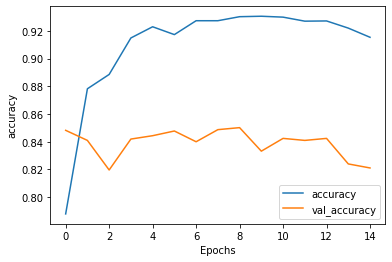

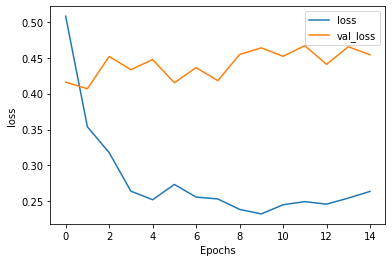


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.787884 	   0.507802 	   0.848206 	   0.416034
       2   0.878191 	   0.353820 	   0.840931 	   0.406836
       3   0.888530 	   0.317838 	   0.819593 	   0.451703
       4   0.914863 	   0.264159 	   0.841901 	   0.433439
       5   0.922940 	   0.252247 	   0.844326 	   0.447426
       6   0.917286 	   0.273517 	   0.847721 	   0.415168
       7   0.927302 	   0.255909 	   0.839961 	   0.436178
       8   0.927302 	   0.253305 	   0.848691 	   0.418085
       9   0.930210 	   0.238784 	   0.850146 	   0.454540
      10   0.930533 	   0.232475 	   0.833172 	   0.463776
      11   0.929887 	   0.245238 	   0.842386 	   0.452009
      12   0.926979 	   0.249575 	   0.840931 	   0.466822
      13   0.927141 	   0.246028 	   0.842386 	   0.440766
      14   0.921971 	   0.254514 	   0.823957 	   0.465342
      15   0.915347 	   0.263821 	   0.821048 	   0.454174


In [25]:
history = model.fit(train_seqs, trainY, epochs = EPOCH, validation_data = (val_seqs, valY), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

194/194 [==============================] - 50s 251ms/step - loss: 0.2616 - accuracy: 0.9162
Train Loss: 0.26158607006073
Train Accuracy: 0.9161550998687744 (Model Metric)
Train Accuracy: 0.9161550888529887 (sklearn Metric)
Train Precision: 0.8095238095238095
Train Recall: 0.8283898305084746
Train F1-score: 0.818848167539267


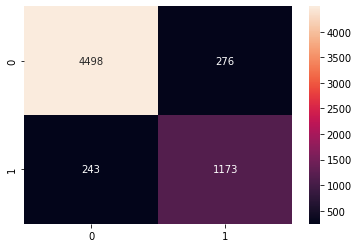

In [26]:
y_pred = model.predict(train_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

65/65 [==============================] - 15s 232ms/step - loss: 0.4542 - accuracy: 0.8210
Validation Loss: 0.4541737139225006
Validation Accuracy: 0.8210475444793701 (Model Metric)
Validation Accuracy: 0.8210475266731329 (sklearn Metric)
Validation Precision: 0.5761589403973509
Validation Recall: 0.5958904109589042
Validation F1-score: 0.5858585858585859


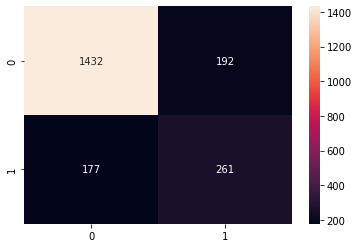

In [27]:
y_pred = model.predict(val_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(valY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(valY, y_pred))
print('Validation Recall:', recall_score(valY, y_pred))
print('Validation F1-score:', f1_score(valY, y_pred))

sns.heatmap(confusion_matrix(valY, y_pred), annot = True, fmt = 'g')

65/65 [==============================] - 18s 257ms/step - loss: 0.4833 - accuracy: 0.8050
Test Loss: 0.48334693908691406
Test Accuracy: 0.805043637752533 (Model Metric)
Test Accuracy: 0.8050436469447139 (sklearn Metric)
Test Precision: 0.5601659751037344
Test Recall: 0.5869565217391305
Test F1-score: 0.5732484076433121


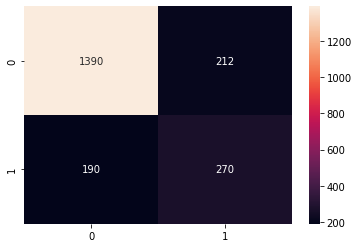

In [28]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')